In [ ]:
# attempts to optimize portfolio using the Efficient Frontier

In [1]:
import pandas_datareader as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# FAANG (FACEBOOK, AMAZON ... )
assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

In [3]:
# assign weights to stocks
weights = np.array([0.2,0.2,0.2,0.2,0.2])

In [4]:
# get the portfolio starting date
stockStartDate = '2013-01-01' # the first four years for Facebook

In [5]:
# ending date
today = datetime.today().strftime('%Y-%m-%d')
today

'2021-04-14'

In [6]:
# create a dataframe to store the adj close of the stocks
df = pd.DataFrame()

# store the adj close into df
for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start = '2017-01-01', end = '2021-04-13')['Adj Close']

In [7]:
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2017-01-03,116.860001,753.669983,27.459938,127.489998,786.140015
2017-01-04,118.690002,757.179993,27.429203,129.410004,786.900024
2017-01-05,120.669998,780.450012,27.568691,131.809998,794.020020
2017-01-06,123.410004,795.989990,27.876030,131.070007,806.150024
2017-01-09,124.900002,796.919983,28.131361,130.949997,806.650024
...,...,...,...,...,...
2021-04-07,313.089996,3279.389893,127.900002,546.989990,2249.679932
2021-04-08,313.019989,3299.300049,130.360001,554.580017,2265.439941
2021-04-09,312.459991,3372.199951,133.000000,555.309998,2285.879883


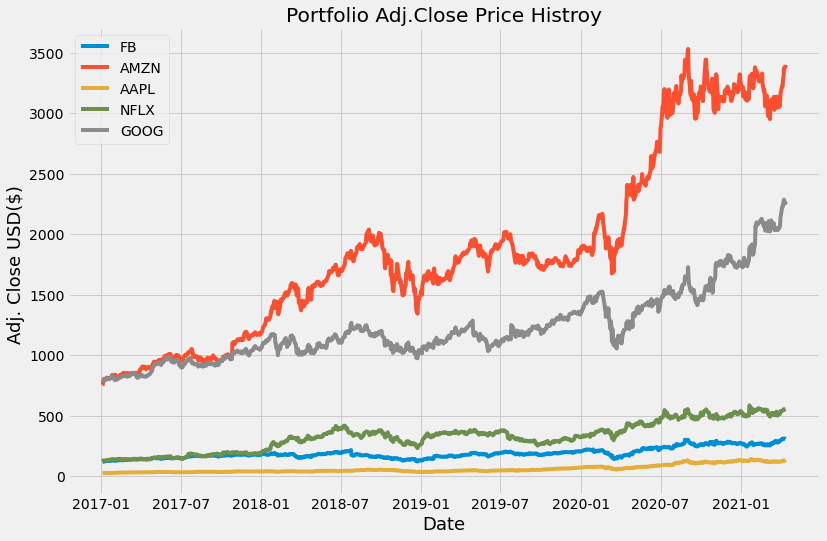

In [8]:
# visually show portfolio
title = 'Portfolio Adj.Close Price Histroy'

# get the stocks
my_stocks = df

# create
plt.figure(figsize=(12,8))
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label= c)
    
plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj. Close USD($) ', fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [9]:
# show the daily simple return
returns = df.pct_change() #  pct_change = (day_price - previous_day_price) / previous_day_price
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.015660,0.004657,-0.001119,0.015060,0.000967
2017-01-05,0.016682,0.030732,0.005085,0.018546,0.009048
2017-01-06,0.022707,0.019912,0.011148,-0.005614,0.015277
2017-01-09,0.012074,0.001168,0.009160,-0.000916,0.000620
...,...,...,...,...,...
2021-04-07,0.022301,0.017237,0.013390,0.004518,0.011206
2021-04-08,-0.000224,0.006071,0.019234,0.013876,0.007005
2021-04-09,-0.001789,0.022096,0.020252,0.001316,0.009023


In [10]:
returns.cov()

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.000456,0.000259,0.000264,0.000272,0.000262
AMZN,0.000259,0.000365,0.000246,0.000308,0.000228
AAPL,0.000264,0.000246,0.000399,0.000246,0.000234
NFLX,0.000272,0.000308,0.000246,0.000634,0.000241
GOOG,0.000262,0.000228,0.000234,0.000241,0.000311


In [11]:
# create the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.115026,0.065380,0.066473,0.068476,0.066015
AMZN,0.065380,0.092084,0.061891,0.077669,0.057383
AAPL,0.066473,0.061891,0.100522,0.062079,0.059061
NFLX,0.068476,0.077669,0.062079,0.159807,0.060731
GOOG,0.066015,0.057383,0.059061,0.060731,0.078285


In [ ]:
# calculate the portfolio variance
port_variance = np.dot(weights.T , np.dot(cov_matrix_annual, weights))
port_variance

In [ ]:
# calculate the portfolio volatility aka std
port_volatility = np.sqrt(port_variance)
port_volatility

In [ ]:
# calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights)*252
portfolioSimpleAnnualReturn

In [ ]:
# show the expected annual return, volatility(risk), varicance
percent_var = str( round(port_variance, 2) * 100)+ '%'
percent_vols = str( round(port_volatility, 2) *100)+ '%'
percent_ret = str( round(portfolioSimpleAnnualReturn, 2)*100) + "%"

print('expected annual return:'+ percent_ret)
print('annual volatility/risk:'+ percent_vols)
print('annual variance:'+ percent_var)

let's see if we can get higher ret with lower vols

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models 
from pypfopt import expected_returns

In [ ]:
# portfolio optimization!

# calculate expected returns and the annualised sample cov matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

In [ ]:
# optimaize for max sharp ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
print(ef.portfolio_performance(verbose=True))

In [ ]:
# get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=15000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))